# Lending Club Case Study - Exploratory Data Analysis
#### By : Kiran Sumit Dalmiya


How data can be used minimize the risk of losing money while lending to customers.

### Problem Statement :

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 
Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


### Risk associated with the problem
If the applicant is likely to repay the loan, then not approving loan is a loss of business (rejecting loans for non - default).
If the applicant is not likely to repay the loan, then approving loan may lead to financial loss (approving loans for default).
The given dataset contains information about past loans and each row represents the loan details of the applicants.

### Expected Result
The aim is to identify patterns/driving factor which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.


#### importing neccessary packeges and libraries

In [20]:

# Importing the numpy and pandas package

import numpy as np
import pandas as pd
 
# For ignoring/Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# For data Visualisation / Graph plotting
import matplotlib.pyplot as plt 
import seaborn as sns

#importing datetime 
from datetime import datetime 

#### importing csv file for Loan data

In [21]:
loan=pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [22]:
loan.shape

(39717, 111)

### Data Cleaning

In [23]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Checking for null value in coulmns and rows and removing the ones with more than 70% null values

In [24]:
# Displaying the column with null values in percentage decending order
(loan.isnull().sum()/len(loan) *100).round(2).sort_values(ascending=False)


verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [25]:
null_values=round(100 * (loan.isnull().sum())/(len(loan)),2)
null_values.loc[null_values>0]

emp_title                       6.19
emp_length                      2.71
desc                           32.59
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [26]:
###There are Many columns with 100 % null values and so..
##We can list all with more than 70% of null values and then remove those columns
empty_cols=null_values.loc[null_values>=70.0]
print(empty_cols)
print(len(empty_cols))

mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24mths              100.00
avg_cur_bal     

In [27]:
# Creating a dataframe loan_df for editing the original dataset and removing all 56 colmns with more than 70% of null values

loan_df=loan
empty_cols=empty_cols.index.tolist()
loan_df.drop(empty_cols,axis=1,inplace=True)

In [28]:
#Checking the loan_df after removing 56 columns
pd.set_option('display.max_columns', 55)
loan_df


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loan

In [29]:
#check for null values again
(loan_df.isnull().sum()/len(loan_df)*100).round(2).sort_values(ascending=False)

mths_since_last_delinq        64.66
desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_acc                      0.00
total_pymnt_inv                0.00
recoveries                     0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
pub_rec                        0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq              

In [30]:
#removing mths_since_last_delinq  colmn it also has high percentage of null values
loan_df.drop('mths_since_last_delinq',axis=1,inplace=True )

In [31]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidat

In [32]:
#removing the columns which will not give any useful insight in analysing the dataset

loan_df.drop(columns=['id','member_id','title','emp_title','url','desc','zip_code'],axis=1,inplace=True)


In [33]:
loan.shape

(39717, 47)

In [34]:
#Removing funded_amnt column as it is almost duplicate of loan_amnt and so dropping funded_amnt_inv also
loan_df.drop(columns=['funded_amnt','funded_amnt_inv'],axis=1,inplace=True )


In [35]:
loan.shape

(39717, 45)

#### Handelling single value columns

In [36]:
#Checking for single value columns and removing them as they are not useful in analysis
loan_df.nunique().sort_values()

tax_liens                         1
acc_now_delinq                    1
initial_list_status               1
pymnt_plan                        1
chargeoff_within_12_mths          1
policy_code                       1
delinq_amnt                       1
collections_12_mths_ex_med        1
application_type                  1
term                              2
verification_status               3
loan_status                       3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [37]:
#Removing single value columns
loan_df.drop(columns=['tax_liens','application_type','pymnt_plan','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt'],axis=1,inplace=True)

In [38]:
loan_df.shape

(39717, 36)

In [39]:
#check for null values again
(loan_df.isnull().sum()/len(loan_df)*100).round(2).sort_values(ascending=False)

emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
last_credit_pull_d         0.01
total_pymnt_inv            0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_rec_int              0.00
total_rec_prncp            0.00
pub_rec                    0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_amnt            0.00
revol_bal                  0.00
loan_amnt                  0.00
term                       0.00
verification_status        0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
home_ownership             0.00
annual_inc                 0.00
issue_d                    0.00
inq_last_6mths             0.00
loan_status                0.00
purpose                    0.00
addr_sta

In [40]:
#Checking the null values in rows 
loan_df.isnull().sum().sort_values(ascending=False)

emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
last_credit_pull_d            2
total_pymnt_inv               0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_rec_int                 0
total_rec_prncp               0
pub_rec                       0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
revol_bal                     0
loan_amnt                     0
term                          0
verification_status           0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
issue_d                       0
inq_last_6mths                0
loan_status                   0
purpose                       0
addr_sta

#### checking for null values in rows

In [41]:
#It not good to impute 1075 null values of emp_length colm ,its better to remove the rows with null values
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df.shape

(38642, 36)

In [42]:
loan_df.emp_length.isnull().sum()

0

In [43]:
#Checking pub_rec_bankruptcies field
loan_df.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36375
1.0     1563
2.0        7
Name: count, dtype: int64

In [44]:
#Here most of the values in pub_rec_bankruptcies column is 0.0 ,so it will make no negative impact on analysis
#if we impute all the null of pub_rec_bankruptcies with 0.0

loan_df.pub_rec_bankruptcies.fillna(0.0,inplace=True)

In [45]:
loan_df.pub_rec_bankruptcies.isnull().sum()

0

In [46]:
#last_pymnt_d,revol_util,last_credit_pull_d  have very few null values ,Removing the rows with null values

loan_df=loan_df[~loan_df.last_pymnt_d.isnull()]
loan_df=loan_df[~loan_df.revol_util.isnull()]
loan_df=loan_df[~loan_df.last_credit_pull_d.isnull()]

In [47]:
loan_df.last_pymnt_d.isnull().sum()

0

In [48]:
loan_df.revol_util.isnull().sum()

0

In [49]:
loan_df.last_credit_pull_d.isnull().sum()

0

In [50]:
#Dropping records where loan_status ='Current' #The loan in progress cannot provide us insights as to whether the borrower is likely to default or not.

loan_df = loan_df[loan_df['loan_status'].str.lower() != "current"]
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,0.0
39713,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,0.0
39714,5000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,0.0
39715,5000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,0.0


#### issue_d : Loan Year  will not likely to help in analysing the loan defaulter patterns  so dropping it
#### earliest_cr_line: will not help much
#### inq_last_6mths : inquiring about loan always does not  logically help in finding defaulters

In [51]:
#issue_d,earliest_cr_line,inq_last_6mths will not effect on defaulter pattern analysis so dropping them

loan_df.drop(columns=['issue_d','earliest_cr_line','inq_last_6mths'],axis=1,inplace=True)

#### The below columns will be available only after loan is sanctioned so not useful in analysis and dropping them 
out_prncp , out_prncp_inv , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_in ,total_rec_late_fee

#### Recoveries and 'collection_recovery_fee'Recoveries is only for the Charged Off loans.
This comes to action after the loan has been Charged Off. so its not userful in analysis.

####  last_pymnt_d , last_pymnt_amnt & last_credit_pull_d are not logically usefull so dropping then 

In [52]:
#Dropping more columns which is not usefull /unavailable during analysing the defaulter patterns in dataset
loan_df.drop(columns=['out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                      'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1,inplace=True)

In [53]:
loan_df.shape

(37433, 21)

In [54]:
#checking and Dropping duplicate rows
loan_df.duplicated().sum()

0

### Standardising the columns 


In [55]:
loan_df.dtypes

loan_amnt                 int64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [56]:
#converting term column to int type,int_rate to float and revol_util to float 
loan_df.term=loan_df.term.apply(lambda x:int(x.replace(' months',''))).astype(int)
loan_df.int_rate=loan_df.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)
loan_df.revol_util=loan_df.revol_util.apply(lambda x:float( x.replace('%','')))

In [57]:
loan_df.dtypes

loan_amnt                 int64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
pub_rec_bankruptcies    float64
dtype: object

In [58]:
#checking other object columns
print(loan_df.grade.value_counts().nunique)
print(loan_df.sub_grade.value_counts().nunique)
print(loan_df.home_ownership.value_counts().nunique)
print(loan_df.verification_status.value_counts().nunique)
print(loan_df.loan_status.value_counts().nunique)
print(loan_df.purpose.value_counts().nunique)


<bound method IndexOpsMixin.nunique of grade
B    11345
A     9653
C     7635
D     4950
E     2602
F      954
G      294
Name: count, dtype: int64>
<bound method IndexOpsMixin.nunique of sub_grade
A4    2792
B3    2744
A5    2630
B5    2557
B4    2381
C1    2009
B2    1943
C2    1889
A3    1740
B1    1720
C3    1450
A2    1440
D2    1249
C4    1171
C5    1116
D3    1084
A1    1051
D1     908
D4     900
D5     809
E1     711
E2     598
E3     499
E4     418
E5     376
F1     300
F2     226
F3     172
F4     146
F5     110
G1      90
G2      76
G4      54
G3      45
G5      29
Name: count, dtype: int64>
<bound method IndexOpsMixin.nunique of home_ownership
RENT        18000
MORTGAGE    16572
OWN          2762
OTHER          96
NONE            3
Name: count, dtype: int64>
<bound method IndexOpsMixin.nunique of verification_status
Not Verified       16216
Verified           11747
Source Verified     9470
Name: count, dtype: int64>
<bound method IndexOpsMixin.nunique of loan_status
Fully P

In [59]:
#above columns are category columns; converting then to category type

loan_df.grade=loan_df.grade.astype('category')
loan_df.sub_grade=loan_df.sub_grade.astype('category')
loan_df.home_ownership=loan_df.home_ownership.astype('category')
loan_df.verification_status=loan_df.verification_status.astype('category')
loan_df.loan_status=loan_df.loan_status.astype('category')
loan_df.purpose=loan_df.purpose.astype('category')
loan_df.addr_state=loan_df.addr_state.astype('category')


In [60]:
loan_df.emp_length.value_counts().nunique

<bound method IndexOpsMixin.nunique of emp_length
10+ years    8478
< 1 year     4488
2 years      4280
3 years      4001
4 years      3328
5 years      3180
1 year       3154
6 years      2164
7 years      1707
8 years      1430
9 years      1223
Name: count, dtype: int64>

In [61]:
#emp_length is also numerical type variable 
# here  lets replace <1 with 0.5 to indicate years less then 1 year

loan_df.emp_length=loan_df.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)


In [62]:
loan_df.dtypes

loan_amnt                  int64
term                       int32
int_rate                 float64
installment              float64
grade                   category
sub_grade               category
emp_length               float64
home_ownership          category
annual_inc               float64
verification_status     category
loan_status             category
purpose                 category
addr_state              category
dti                      float64
delinq_2yrs                int64
open_acc                   int64
pub_rec                    int64
revol_bal                  int64
revol_util               float64
total_acc                  int64
pub_rec_bankruptcies     float64
dtype: object

#### checking for outliers


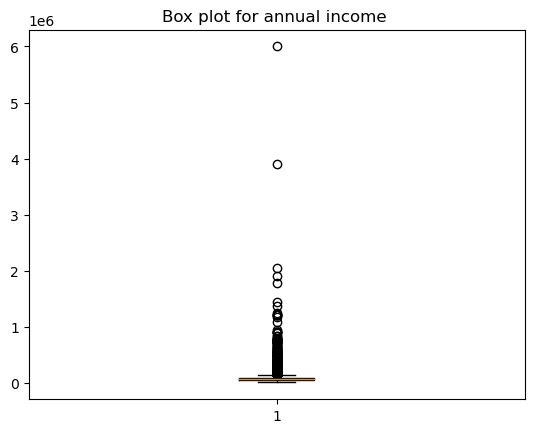

In [63]:
# checking outlier for annual income
plt.boxplot(loan_df['annual_inc'])
plt.title('Box plot for annual income ',)
plt.show()


In [64]:
quan_ann_inc = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quan_ann_inc

0.50     60000.00
0.75     83000.00
0.90    117000.00
0.95    142000.00
0.97    167000.00
0.98    189997.44
0.99    235000.00
Name: annual_inc, dtype: float64

In [65]:
per_95_ann_inc = loan_df.annual_inc.quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_ann_inc]

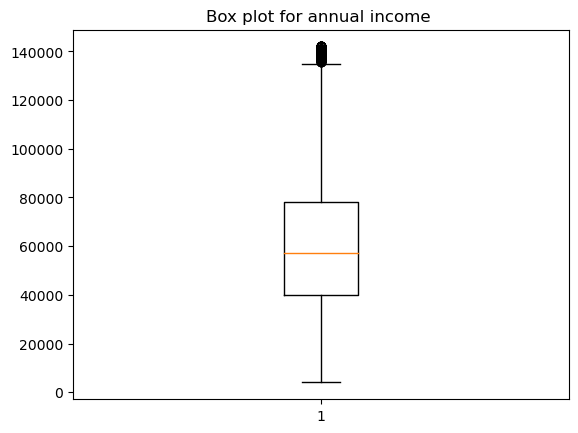

In [66]:
plt.boxplot(loan_df['annual_inc'])
plt.title('Box plot for annual income ',)
plt.show()

<Axes: >

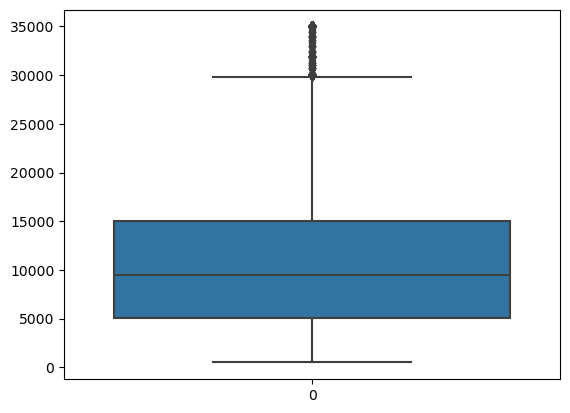

In [67]:
#Now checking others numeric columns for outliers which are logically usefull i.e loan_amount and dti
sns.boxplot(loan_df.loan_amnt)

<Axes: >

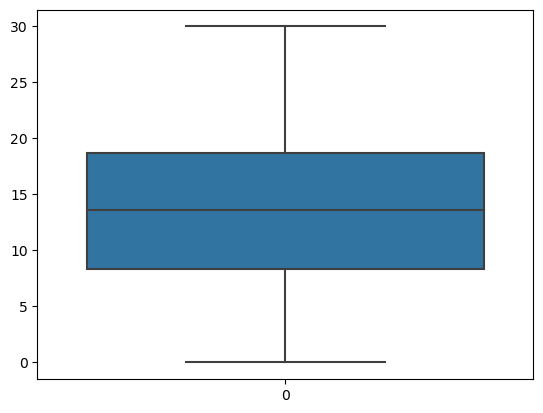

In [68]:
sns.boxplot(loan_df.dti)

#### Data Looks Fine Now


## Data analysis

### Univariate Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

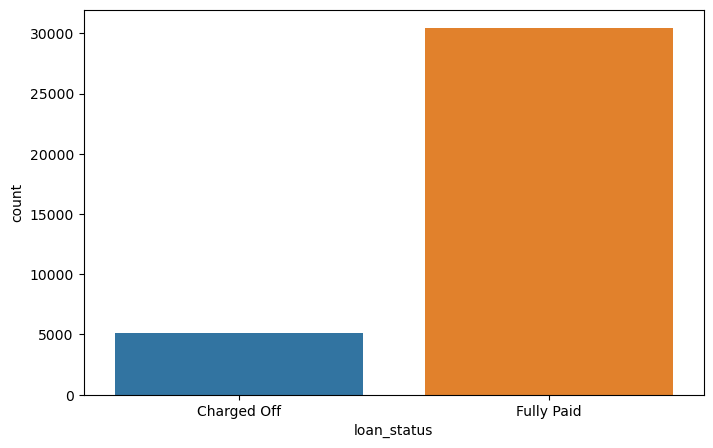

In [69]:
#Drawing plot of loan_status column

plt.figure(figsize=(8,5))
sns.countplot(x = 'loan_status', data = loan_df)

#### Insight from above plot : Charged off loans are less compare to fully paid loans


In [70]:
#Checking for Home_Ownership

loan_df.home_ownership.unique()

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

<Axes: xlabel='home_ownership', ylabel='count'>

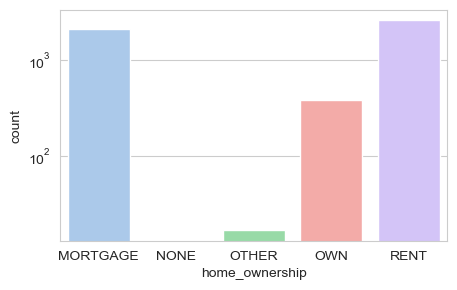

In [131]:
fig, ax = plt.subplots(figsize = (5,3))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df.loan_status == 'Charged Off'])

#### Observation: 
Most borrowers do not own property and instead are in a mortgage or rental arrangement.

<Axes: xlabel='grade', ylabel='count'>

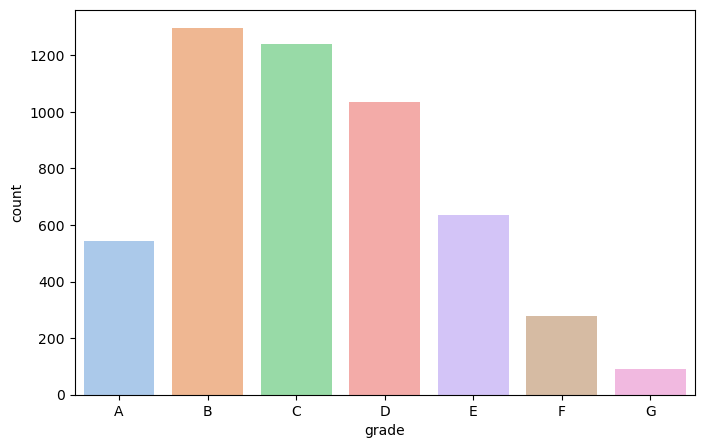

In [72]:
#now checking for grade
sns.fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette('pastel')
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

####  Observation :
A large amount of loans are with grade B,C and D 

In [73]:
#now checking for sub grade
loan_df.sub_grade = pd.to_numeric(loan_df.sub_grade.apply(lambda x : x[-1]))
loan_df.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

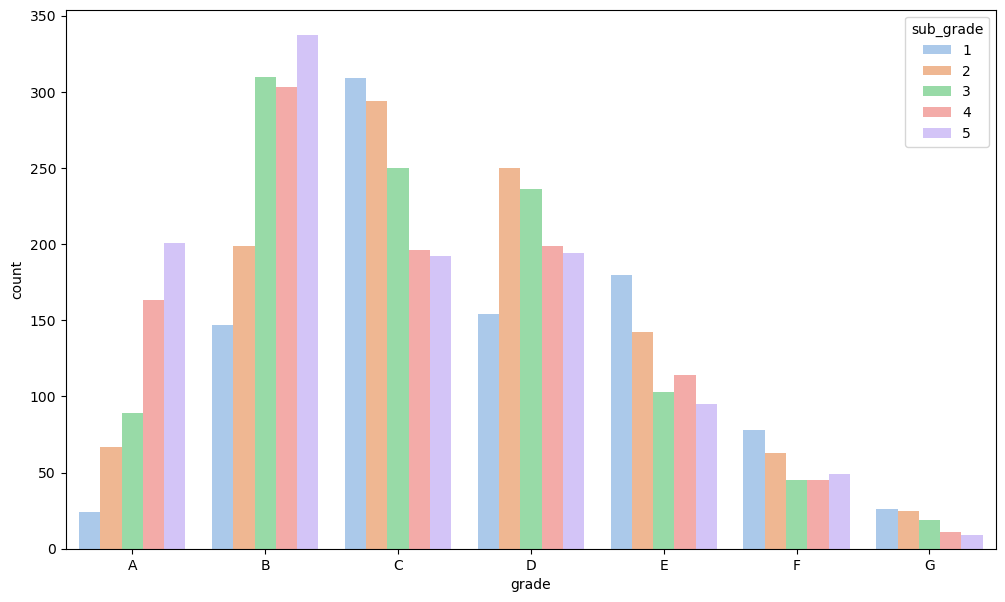

In [74]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('pastel')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_df[loan_df.loan_status == 'Charged Off'])
#sns.countplot(loan_df.sub_grade)

In [75]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,4,0.5,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,5,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,1,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,4,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,9,0,7963,28.3,12,0.0


<Axes: xlabel='addr_state', ylabel='count'>

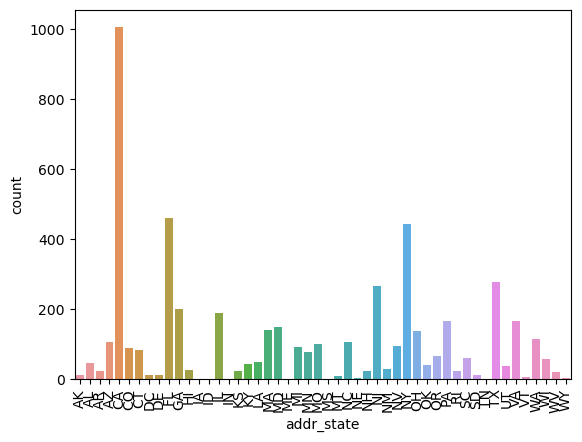

In [76]:
# Checking for loan defalut as per addresss

plt.xticks(rotation=90)
sns.countplot(x='addr_state',data=loan_df[loan_df.loan_status=='Charged Off'])


#### Observation
Most number of loan are taken from CA state then florida,new york and texas respectively

California had the most "Charged off" loan applicants. To address this, the lending company should consider stricter eligibility criteria or better credit assessments for applicants from California.

<Axes: xlabel='term', ylabel='count'>

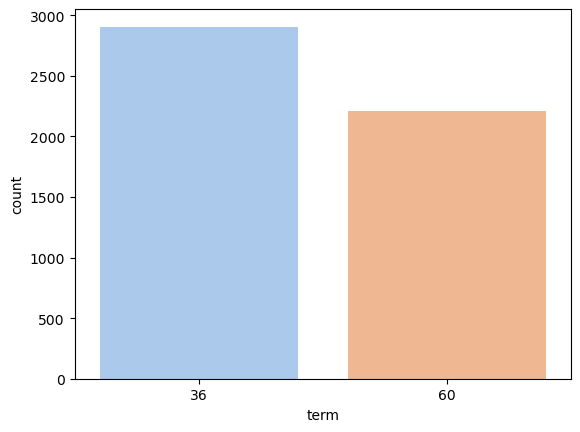

In [77]:
# Checking for loan defalut as per loan term
sns.countplot(x='term',data=loan_df[loan_df.loan_status=='Charged Off'])

#### Observation
The majority of "Charged off" applicants favored short-term loans lasting 36 months, indicating that a significant number of borrowers facing loan default opted for quicker repayment periods.

<Axes: xlabel='verification_status', ylabel='count'>

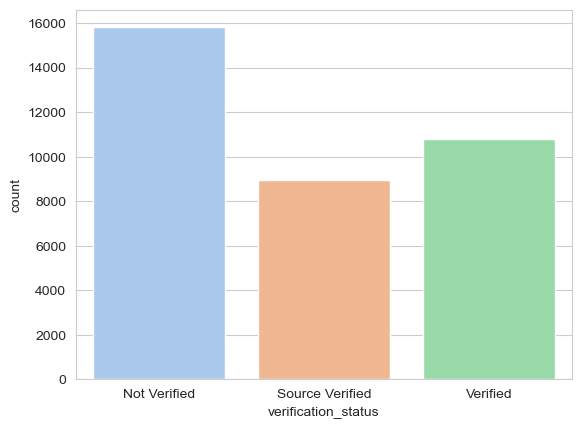

In [130]:
#Checking for verification status

sns.countplot(x='verification_status', data=loan_df)

#### Observation
Borrowers with "Not Verified" status tend to default a bit more than those with "Verified" status. Therefore, solely relying on verification status may not provide sufficient insight into identifying patterns of defaulters; will check in bivariate analysis.

<Axes: xlabel='purpose', ylabel='count'>

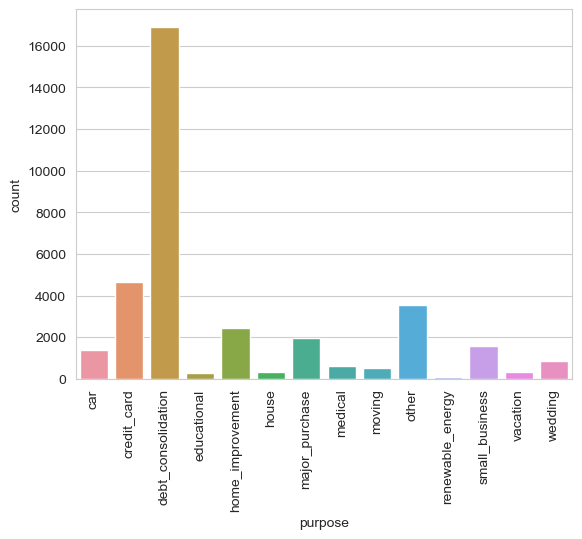

In [128]:
#Checking for loan purpose
plt.xticks(rotation=90)
sns.countplot(x='purpose',data=loan_df)


#### Observation
Debt consolidation was the top reason for "Charged off" loans. The lending company should be careful when approving loans for debt consolidation, as it led to the most defaults.

<Axes: xlabel='emp_length', ylabel='count'>

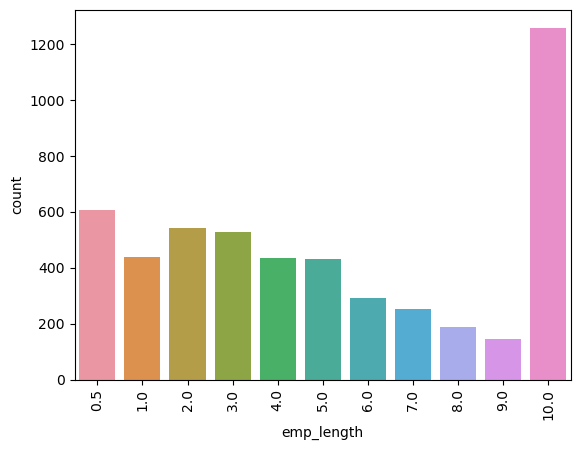

In [80]:
#Checking  for emp_length
plt.xticks(rotation=90)
sns.countplot(x='emp_length',data=loan_df[loan_df.loan_status=='Charged Off'])

#### Observation
Applicants with over 10 years of work experience had the highest number of "Charged off" loans, totaling 1,474. 
This suggests that even with a long employment history, successful loan repayment wasn't guaranteed.


In [81]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,5000,36,10.65,162.87,B,2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,13648,83.7,9,0.0
1,2500,60,15.27,59.83,C,4,0.5,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,1687,9.4,4,0.0
2,2400,36,15.96,84.33,C,5,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.5,10,0.0
3,10000,36,13.49,339.31,C,1,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,5598,21.0,37,0.0
5,5000,36,7.90,156.46,A,4,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,9,0,7963,28.3,12,0.0


In [82]:
# Checking for annual_inc we will create bin/buckets of annual income
loan_df.annual_inc.describe()

count     35566.000000
mean      61509.942073
std       27763.208094
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

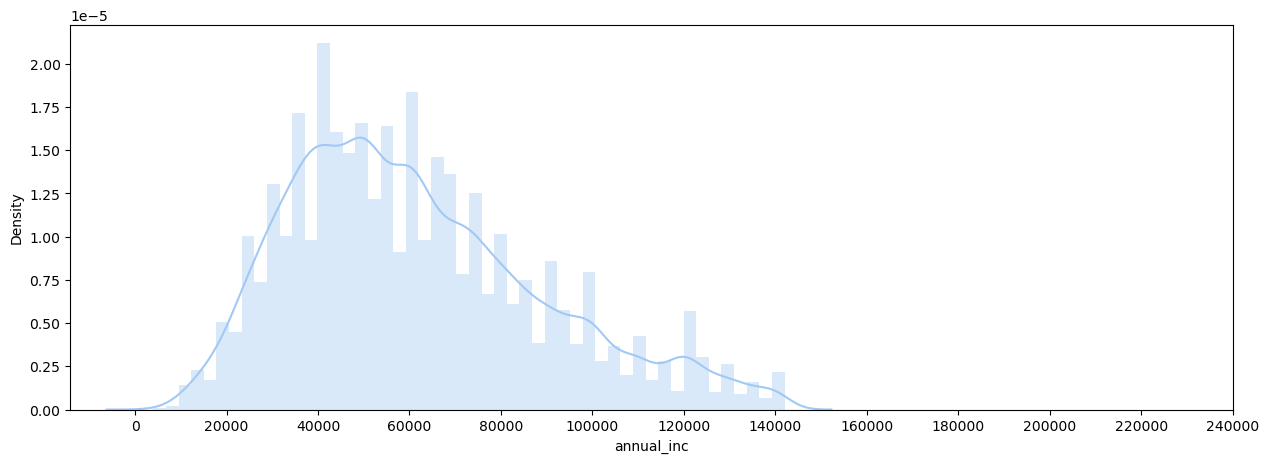

In [83]:
plt.figure(figsize=(15, 5))
sns.distplot(loan_df.annual_inc, hist_kws={'log':False},kde=True)
plt.xticks(np.arange(0, 260000, 20000))
plt.show()

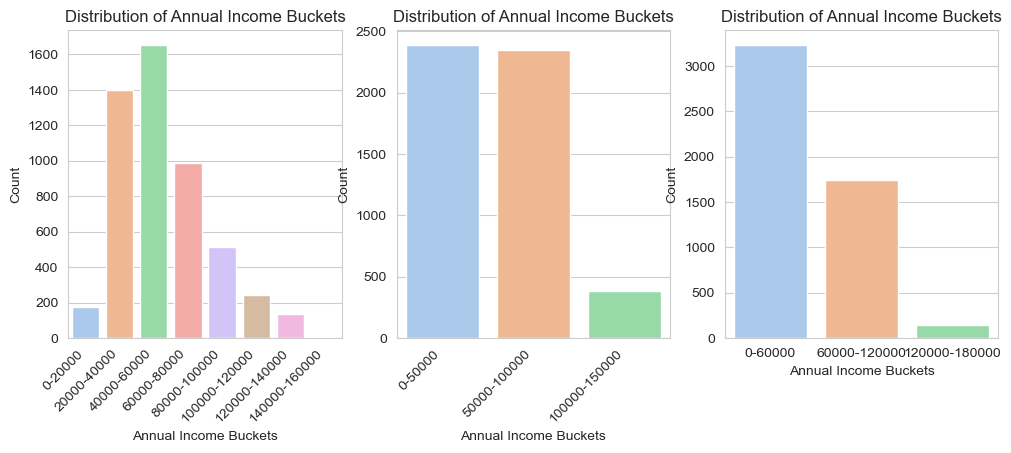

In [84]:
# to observe it more clearly bucketting the annual income with diffrent bucket sizes

sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(12, 4))

# subplot 1

bucket_size = 20000
# Create the income buckets
loan_df['income_buckets'] = pd.cut(loan_df['annual_inc'], bins=range(0, int(loan_df['annual_inc'].max()) + bucket_size, bucket_size), labels=[f'{i}-{i+bucket_size}' for i in range(0, int(loan_df['annual_inc'].max()), bucket_size)])

plt.subplot(1, 3, 1)

ax = sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'], x='income_buckets', order=loan_df['income_buckets'].value_counts().index.sort_values())
ax.set(xlabel='Annual Income Buckets', ylabel='Count', title='Distribution of Annual Income Buckets')
plt.xticks(rotation=45, ha='right')

# subplot 2
bucket_size=50000
loan_df['income_buckets'] = pd.cut(loan_df['annual_inc'], bins=range(0, int(loan_df['annual_inc'].max()) + bucket_size, bucket_size), labels=[f'{i}-{i+bucket_size}' for i in range(0, int(loan_df['annual_inc'].max()), bucket_size)])

plt.subplot(1, 3, 2)

ax = sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'], x='income_buckets', order=loan_df['income_buckets'].value_counts().index.sort_values())

ax.set(xlabel='Annual Income Buckets', ylabel='Count', title='Distribution of Annual Income Buckets')
plt.xticks(rotation=45, ha='right')

# subplot 3
bucket_size=60000
loan_df['income_buckets'] = pd.cut(loan_df['annual_inc'], bins=range(0, int(loan_df['annual_inc'].max()) + bucket_size, bucket_size), labels=[f'{i}-{i+bucket_size}' for i in range(0, int(loan_df['annual_inc'].max()), bucket_size)])

plt.subplot(1, 3, 3)

ax = sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'], x='income_buckets', order=loan_df['income_buckets'].value_counts().index.sort_values())

ax.set(xlabel='Annual Income Buckets', ylabel='Count', title='Distribution of Annual Income Buckets')


plt.show()



#### Observation
Loan applicants who faced repayment issues ("charged off") typically earned less than 60,000 USD more specifically earn 
between 20000 to 600000 annually. 
(This can be because people with less then 20000 annul income are hardly taking any bigger loan.)
For individuals within this income range, it is advisable for the lending company to exercise prudence 
by implementing stringent income verification processes and conducting thorough assessments of repayment capacity.

Later we will see bivariate analysis of defaulters by income buckets and loan amounts .

<Figure size 600x300 with 0 Axes>

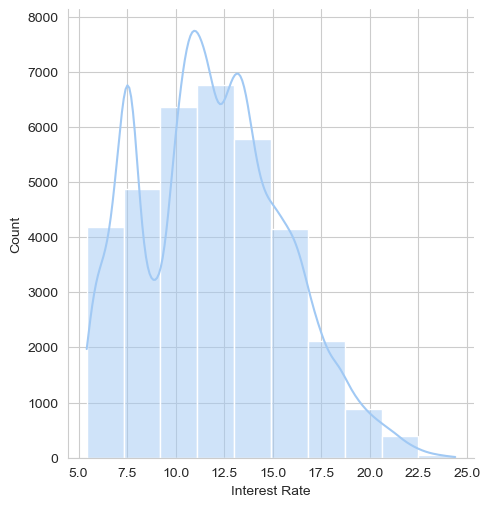

In [85]:
# Checking for interest rate

plt.figure(figsize=(6,3))
#sns.countplot(data=loan_df[loan_df.loan_status=='Charged Off'], x='int_rate',)

sns.displot(sorted(loan_df.int_rate),bins=10,kde=True)
plt.xlabel('Interest Rate')
plt.show()

#### Observation
Defaulter decreases as the interest rate increases after 15.0 % of interset rate...
for lower interest rate it keep incresing ; only exception is at around 10.0% interest rate where defaulter rate fell. 



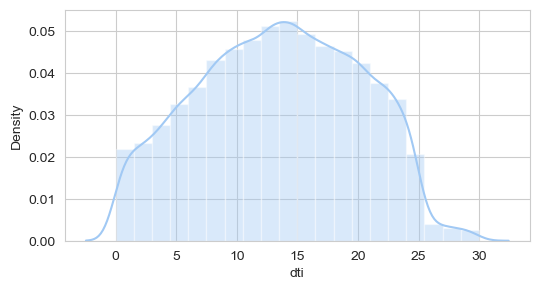

In [86]:
# checking of dti
plt.figure(figsize=(6,3))
sns.distplot(loan_df.dti,kde=True,bins=20)
plt.show()

#### Observation
Most borrowers have a big difference between their debt and income, especially in the 10-15 DTI range.

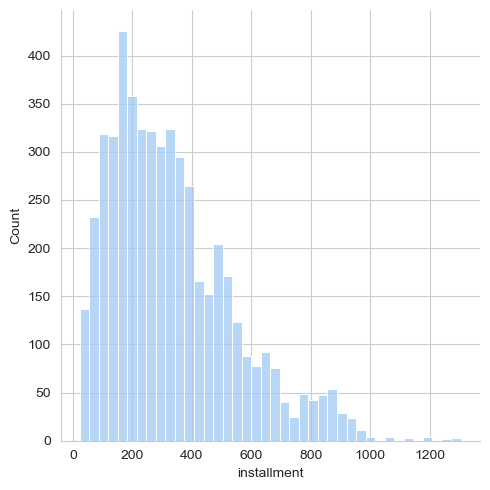

In [87]:
#Checking installment
sns.displot(x='installment',data=loan_df[loan_df.loan_status=='Charged Off'])

#### Observation
Loan participants who defaulted commonly had monthly installment amounts ranging from 150 to 450 USD. 
To minimize the risk of loan defaults, the lending company should carefully monitor and evaluate applicants with similar installment amounts.

In [88]:
loan_df.pub_rec_bankruptcies.value_counts().nunique

<bound method IndexOpsMixin.nunique of pub_rec_bankruptcies
0.0    34073
1.0     1488
2.0        5
Name: count, dtype: int64>

<Figure size 1000x500 with 0 Axes>

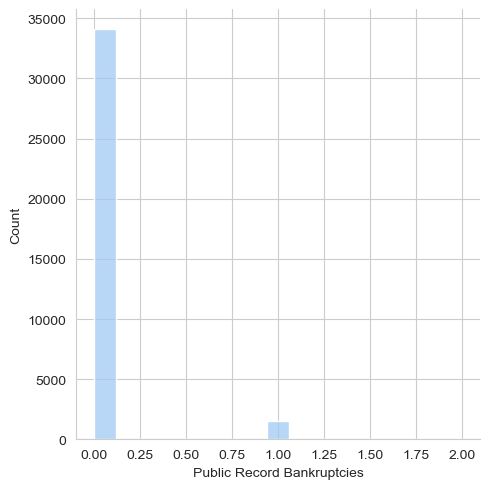

In [89]:
#checking for pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.displot(data=loan_df,x='pub_rec_bankruptcies')
plt.xlabel('Public Record Bankruptcies')

plt.show()

#### Observation
Most borrowers lack any Public Recorded Bankruptcy on their records.

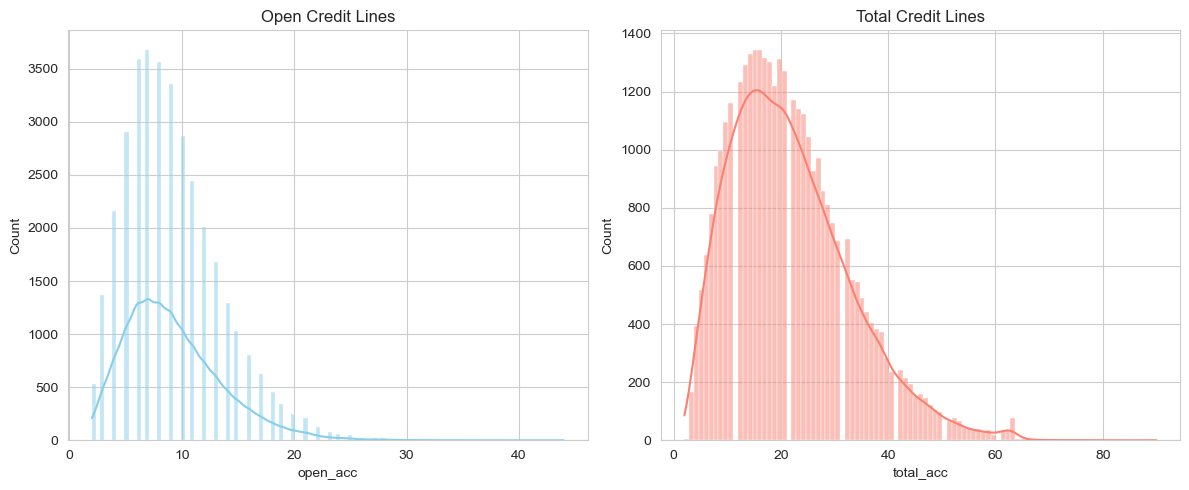

In [90]:
#checking for open_acc and total_acc

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Subplot 1: Distribution of variable 1
sns.histplot(data=loan_df, x='open_acc', kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Open Credit Lines')

# Subplot 2: Distribution of variable 2
sns.histplot(data=loan_df, x='total_acc', kde=True, color='salmon', ax=axes[1])
axes[1].set_title('Total Credit Lines')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [91]:
print(loan_df.groupby('loan_status')['open_acc'].describe())
print()
print(loan_df.groupby('loan_status')['total_acc'].describe())

               count      mean       std  min  25%  50%   75%   max
loan_status                                                        
Charged Off   5118.0  9.186010  4.478182  2.0  6.0  9.0  12.0  38.0
Fully Paid   30448.0  9.200736  4.323021  2.0  6.0  8.0  12.0  44.0

               count       mean        std  min   25%   50%   75%   max
loan_status                                                            
Charged Off   5118.0  21.291520  11.339357  2.0  13.0  19.0  28.0  74.0
Fully Paid   30448.0  21.760772  11.196119  2.0  13.0  20.0  28.0  90.0


#### observation:  we can remove open_acc and Total_acc from analysis

There is no substantial difference in the number of credit lines between charged-off and fully paid loans for both columns.
The are approx. 22 average credit lines for the borrower's in total credit lines and most of the borrowers have 9 open credit lines



<Figure size 1000x500 with 0 Axes>

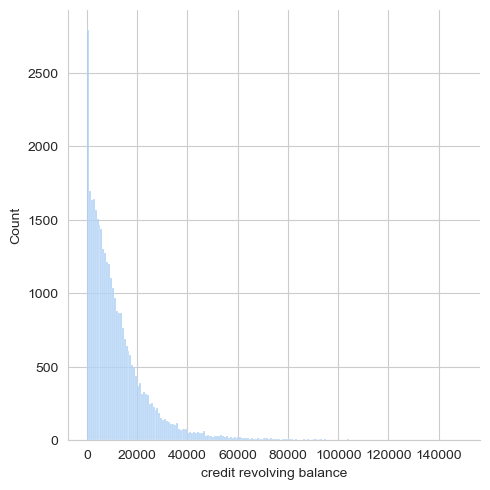

               count          mean           std  min     25%     50%  \
loan_status                                                             
Charged Off   5118.0  12924.454474  13738.138897  0.0  3989.5  9143.0   
Fully Paid   30448.0  12318.275256  13794.536534  0.0  3554.0  8516.0   

                 75%       max  
loan_status                     
Charged Off  17072.0  137112.0  
Fully Paid   16126.5  149000.0  


In [92]:
# checking for Total credit revolving balance
plt.figure(figsize=(10,5))
sns.displot(data=loan_df,x='revol_bal')
plt.xlabel('credit revolving balance')

plt.show()
print (loan_df.groupby('loan_status')['revol_bal'].describe() )

#### Observation:

The mean revolving balance does not show a significant difference between charged-off and fully paid loans.
we can remove it from our analysis

<Figure size 1000x500 with 0 Axes>

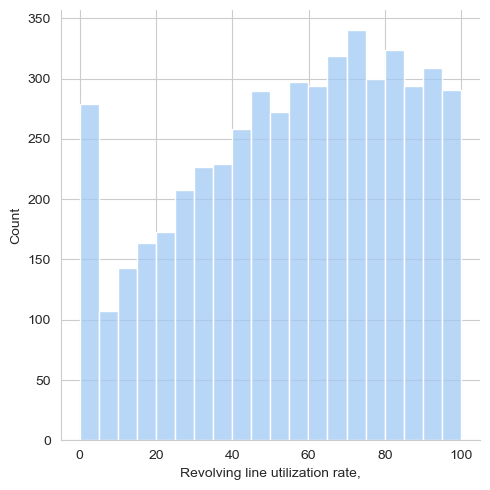

               count       mean        std  min     25%   50%   75%   max
loan_status                                                              
Charged Off   5118.0  55.602808  27.830359  0.0  34.425  58.6  78.9  99.9
Fully Paid   30448.0  47.678839  28.169331  0.0  24.200  47.8  70.8  99.9


In [93]:
# checking for Revolving line utilization rate, revol_util
plt.figure(figsize=(10,5))
sns.displot(data=loan_df[loan_df.loan_status=='Charged Off'],x='revol_util')
plt.xlabel('Revolving line utilization rate,')

plt.show()
print (loan_df.groupby('loan_status')['revol_util'].describe() )

#### Observation :
The average utilization rate is around 48%
Average revolving Utilisation rate is seen to be higher for Charged Off loans than the Fully Paid loans.

## Bivariate and Multivariate analysis 

In [109]:
loan_df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,income_buckets
0,5000,36,10.65,162.87,B,2,10.0,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,3,0,13648,83.7,9,0.0,0-60000
1,2500,60,15.27,59.83,C,4,0.5,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,3,0,1687,9.4,4,0.0,0-60000
2,2400,36,15.96,84.33,C,5,10.0,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2,0,2956,98.5,10,0.0,0-60000
3,10000,36,13.49,339.31,C,1,10.0,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,10,0,5598,21.0,37,0.0,0-60000
5,5000,36,7.90,156.46,A,4,3.0,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,9,0,7963,28.3,12,0.0,0-60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,36,8.70,158.30,B,1,5.0,MORTGAGE,75000.0,Not Verified,Fully Paid,credit_card,CO,15.55,0,10,0,66033,23.0,29,0.0,60000-120000
39712,2500,36,8.07,78.42,A,4,4.0,MORTGAGE,110000.0,Not Verified,Fully Paid,home_improvement,CO,11.33,0,13,0,7274,13.1,40,0.0,60000-120000
39713,8500,36,10.28,275.38,C,1,3.0,RENT,18000.0,Not Verified,Fully Paid,credit_card,NC,6.40,1,6,0,8847,26.9,9,0.0,0-60000
39714,5000,36,8.07,156.84,A,4,0.5,MORTGAGE,100000.0,Not Verified,Fully Paid,debt_consolidation,MA,2.30,0,11,0,9698,19.4,20,0.0,60000-120000


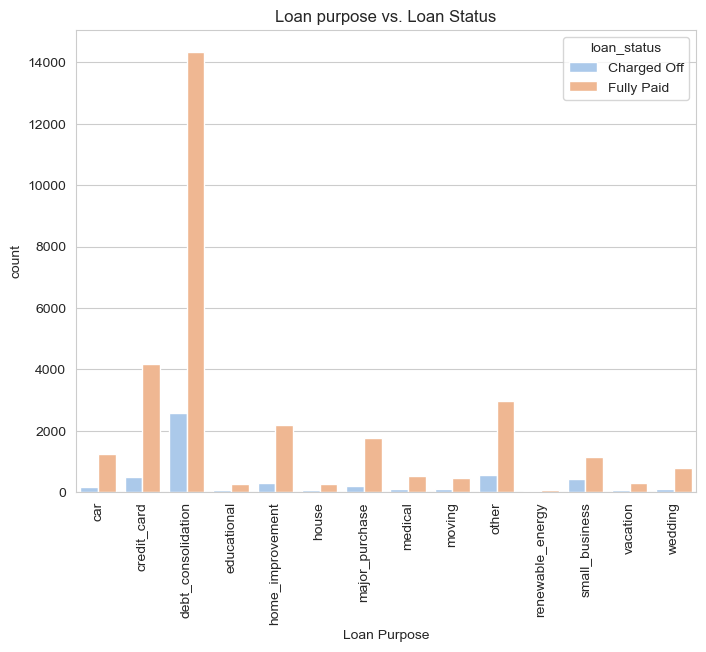

In [132]:
    # Checking for loan purpose Vs Loan Status 
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_df, x='purpose', hue='loan_status')

# Set label and title
plt.xlabel('Loan Purpose')
plt.title('Loan purpose vs. Loan Status')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#### Observation: 
Debt consolidation was the top reason for "Charged off" loans followed by small business. The lending company should be careful when approving loans for debt consolidation as well as small business as it led to the most defaults.

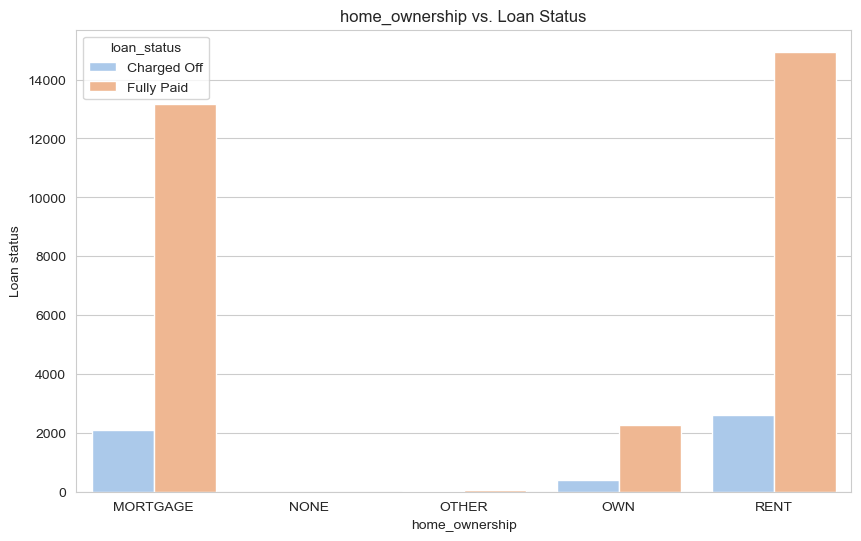

In [118]:
# Checking for Home Ownership Vs Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='home_ownership', hue='loan_status')

# Set label and title
plt.xlabel('home_ownership')

plt.title('home_ownership vs. Loan Status')

# Show the plot
plt.show()

#### Observation: 
Most borrowers who lives in mortgage or rental arrangement are more likey to default.

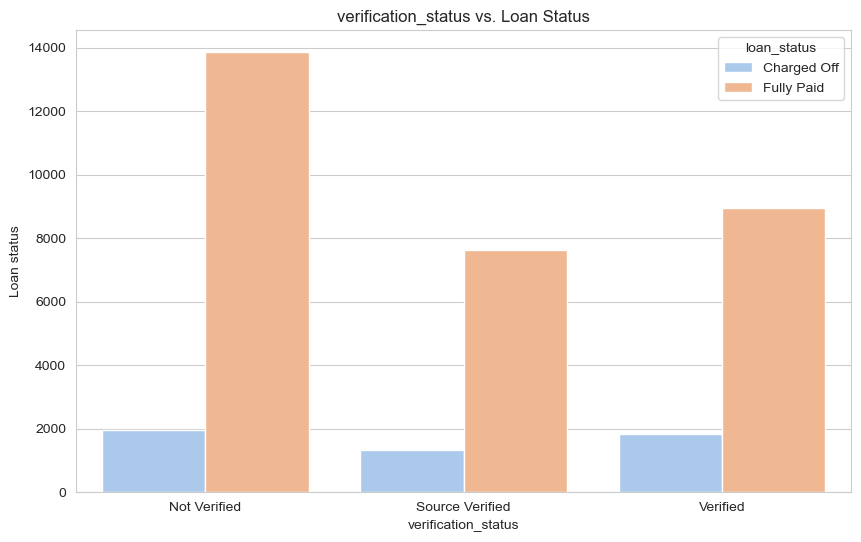

In [119]:
# Checking for verification status Vs Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='verification_status', hue='loan_status')

# Set label and title
plt.xlabel('verification_status')

plt.title('verification_status vs. Loan Status')

# Show the plot
plt.show()

#### Observation: 
Does not give any usefull insights .

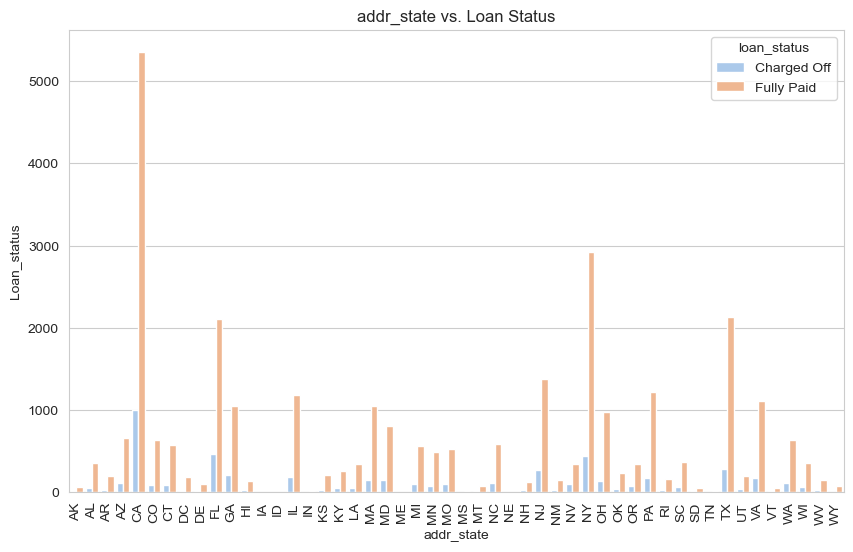

In [122]:
# Checking for addr_state Vs Loan Status 
plt.figure(figsize=(10, 6))
sns.countplot(data=loan_df, x='addr_state', hue='loan_status')

# Set labels and title
plt.xlabel('addr_state')

plt.title('addr_state vs. Loan Status')
plt.xticks(rotation=90)
# Show the plot
plt.show()

#### Observation
Most number of loan are taken from CA state then florida,new york and texas respectively

California had the most "Charged off" loan applicants. To address this, the lending company should consider stricter eligibility criteria or better credit assessments for applicants from California.

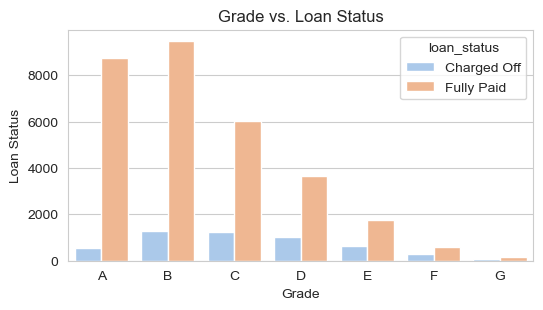

In [123]:
# Checking for grade vs Loan status
plt.figure(figsize=(6, 3))
sns.countplot(data=loan_df, x='grade', hue='loan_status')

# Set labels and title
plt.xlabel('Grade')

plt.title('Grade vs. Loan Status')

# Show the plot
plt.show()

####  Observation :
Borrower who are in grade B,C and D are tend to default more

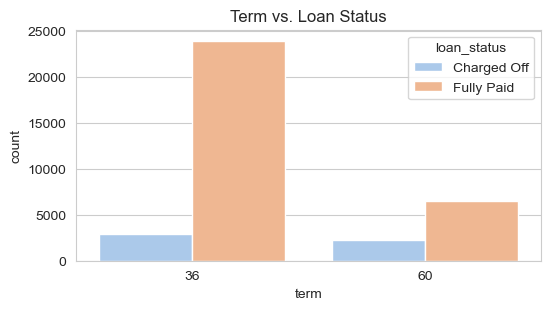

In [126]:
# Checking for term Vs Loan status
plt.figure(figsize=(6, 3))
sns.countplot(data=loan_df, x='term', hue='loan_status')

# Set labels and title
plt.xlabel('Term')
plt.ylabel('Loan Status')
plt.title('Term vs. Loan Status')

# Show the plot
plt.show()

#### Observation
The majority of "Charged off" applicants favored short-term loans lasting 36 months, indicating that a significant number of borrowers facing loan default opted for quicker repayment periods.

#### Loan_amnt vs Loan Status

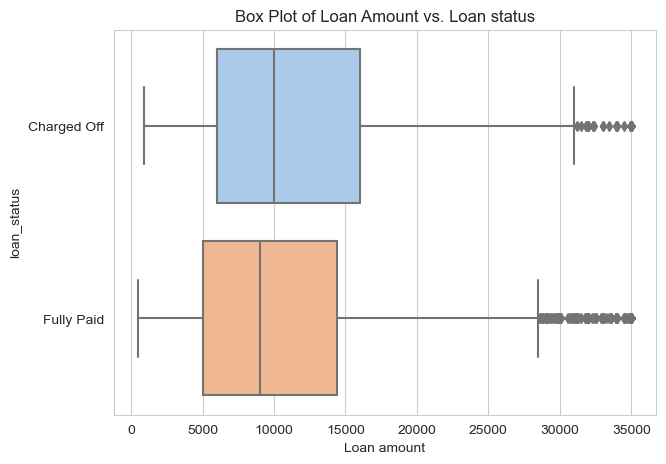

In [136]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=loan_df, x='loan_amnt', y='loan_status')
plt.xlabel('Loan amount')
plt.title('Box Plot of Loan Amount vs. Loan status')
plt.show()


#### Observation
The majority of "Charged off" applicants takes high amount loans.Whenever providing high amount loan ,company should do more checks diffrent attributes.

#### Annual Income vs Loan Status

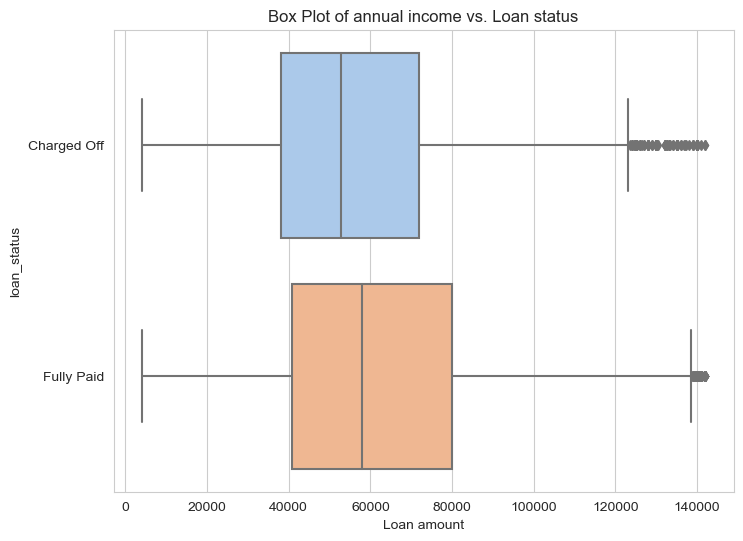

In [145]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_df, x='annual_inc',y='loan_status')
plt.xlabel('Loan amount')
plt.title('Box Plot of annual income vs. Loan status')
plt.show()


#### Observation
The majority of "Charged off" applicants have annual income between 38000 to 730000.

#### dti vs Loan Status

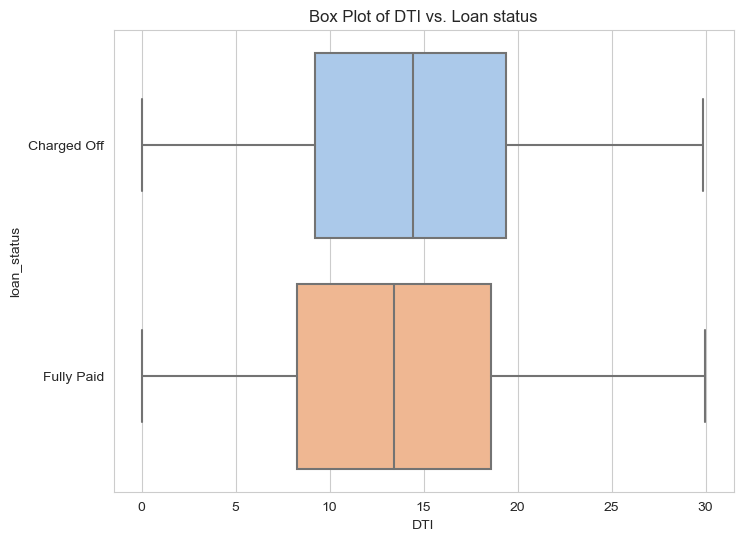

In [147]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_df, x='dti',y='loan_status')
plt.xlabel('DTI')
plt.title('Box Plot of DTI vs. Loan status')
plt.show()


#### Observation

The majority of loan applicants who charged off had significantly high Debt-to-Income (DTI) ratios.

#### interest rate vs Loan Status

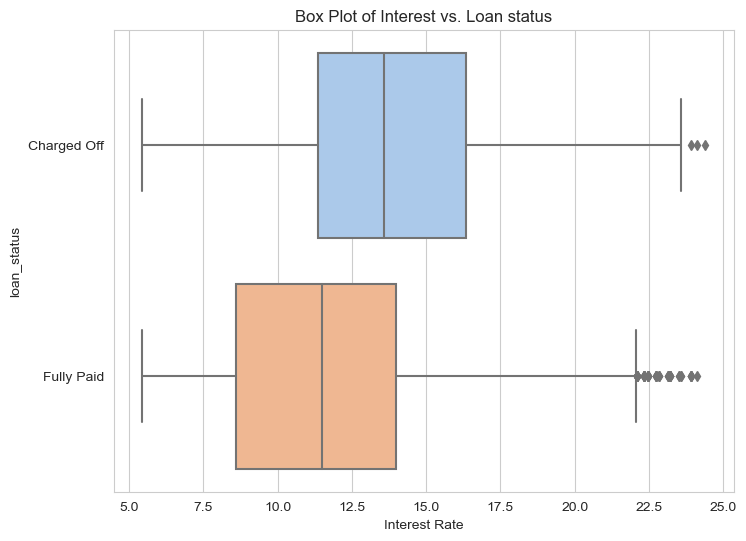

In [148]:
plt.figure(figsize=(8,6))
sns.boxplot(data=loan_df, x='int_rate',y='loan_status')
plt.xlabel('Interest Rate')
plt.title('Box Plot of Interest vs. Loan status')
plt.show()


#### Observation

A significant portion of loan applicants who defaulted received loans with interest rates falling within the range of 12% to 16%.

####  'Box Plot of Loan Amount vs. Grade'

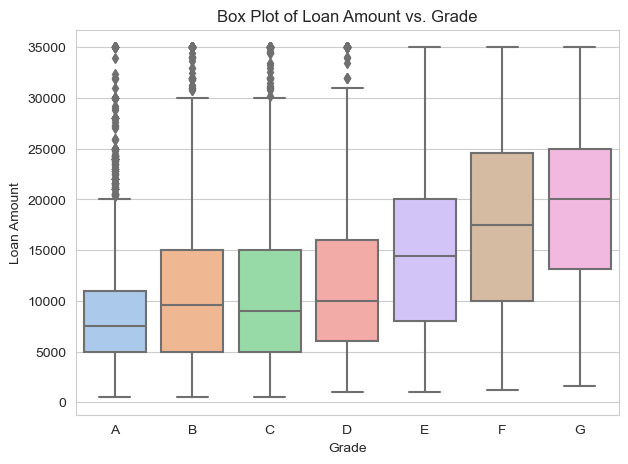

In [95]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=loan_df, x='grade', y='loan_amnt')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.title('Box Plot of Loan Amount vs. Grade')
plt.show()


#### Observation
Bigger loans usually get lower grades. For instance, a grade G loan has a median amount almost $10,000 more than grades A, B, or C loans.

#### Annual income with Grade

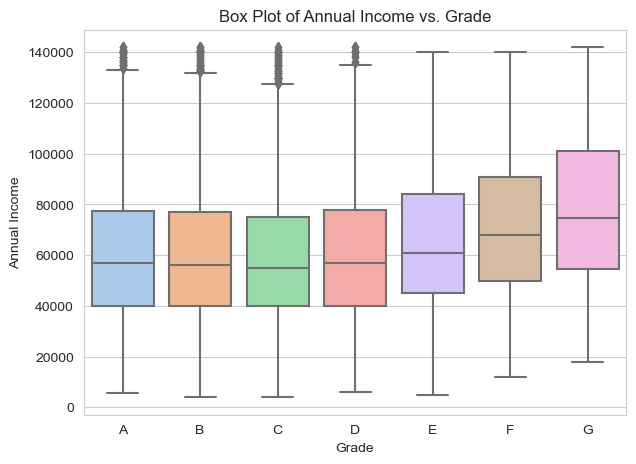

In [96]:
plt.figure(figsize=(7, 5))
sns.boxplot(data=loan_df, x='grade', y='annual_inc')
plt.xlabel('Grade')
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income vs. Grade')
plt.show()

#### Observation
High earning people usually get lower grades;
By comparing this plot with loan amount vs grade plot we can observe that the people with higher income borrow high amount of loan

#### Loan vs. Interest Rate vs. Loan Status:

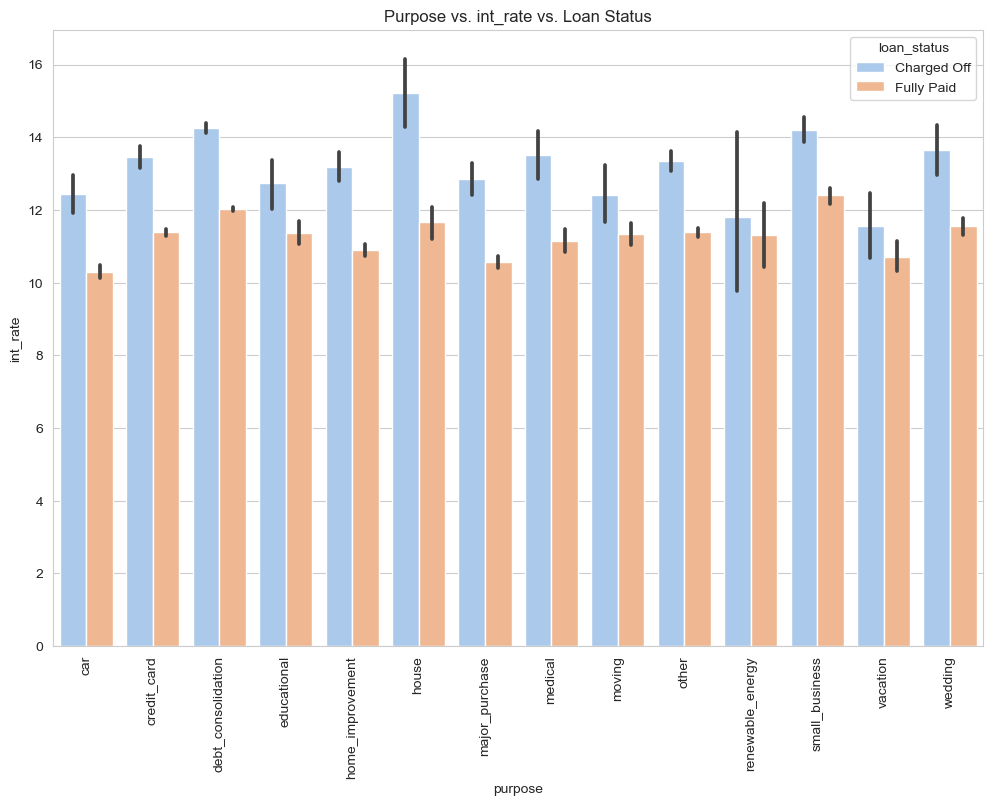

In [99]:
#Purpose of Loan vs. Interest Rate vs. Loan Status:
plt.figure(figsize=(12, 8))
sns.barplot(data=loan_df, x='purpose', y='int_rate', hue='loan_status', estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Purpose vs. int_rate vs. Loan Status')
plt.show()

####  Observation
When Loan taken on higher rate and for small business,house and debt consolidation are more likely to get defaulted

#### Home Ownership vs. Annual Income vs. Loan Status

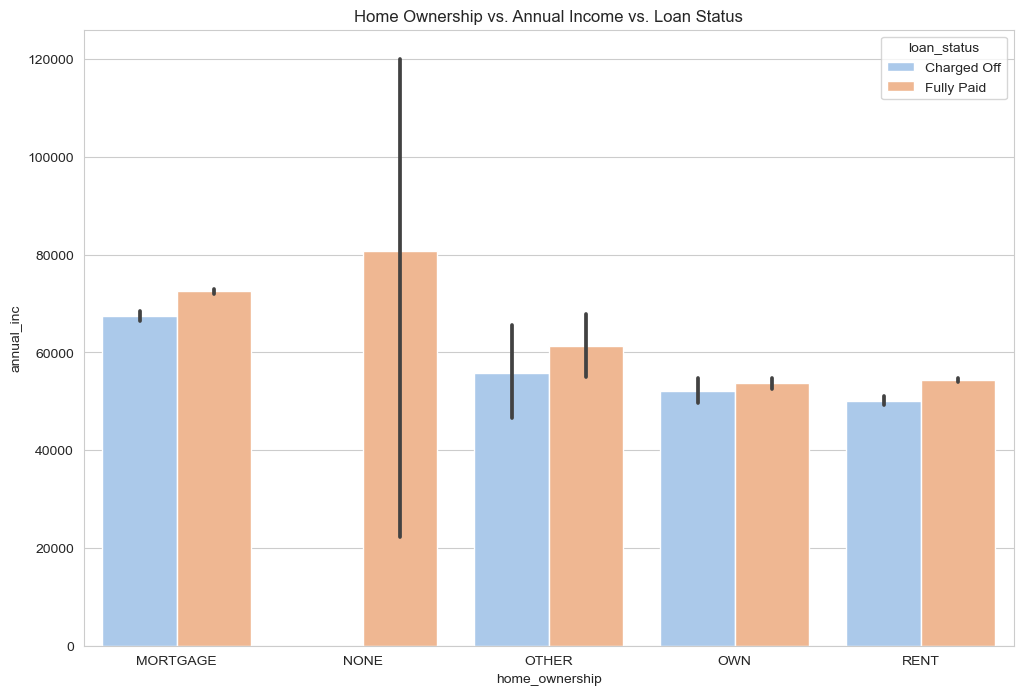

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(data=loan_df, x='home_ownership', y='annual_inc', hue='loan_status')
plt.title('Home Ownership vs. Annual Income vs. Loan Status')
plt.show()


#### Observation:
    Borrower living in mortage home is generally more likely to be a defaulter if their annual income is less then 70000

####  Grade vs. Loan amount vs. Term

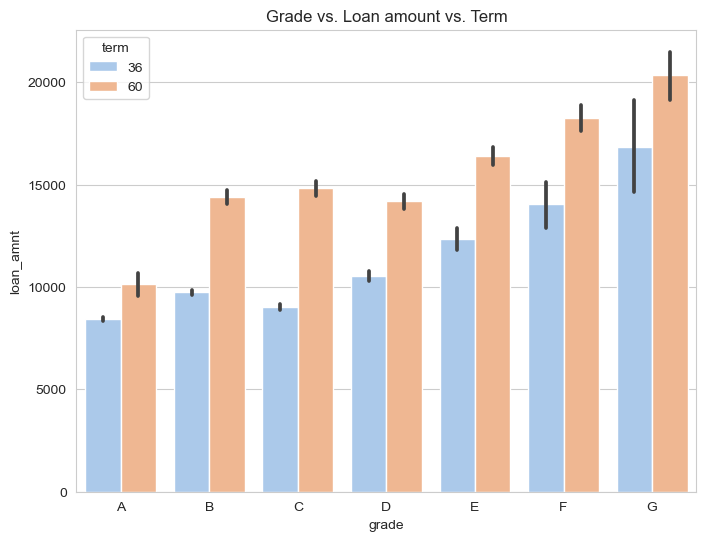

In [104]:
plt.figure(figsize=(8, 6))
sns.barplot(x='grade', y='loan_amnt', hue="term", data=loan_df, estimator=np.mean)
plt.title('Grade vs. Loan amount vs. Term')
plt.show()

#### Observation
High earning people usually gets lower grade & borrow high amount of loan and for long term here say 60 months

#### Loan Term vs. Loan Amount vs. Loan Status


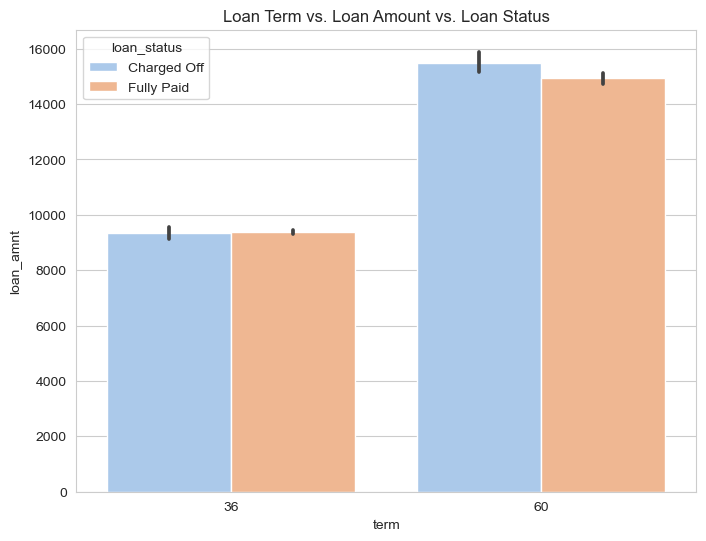

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(data=loan_df, x='term', y='loan_amnt', hue='loan_status')
plt.title('Loan Term vs. Loan Amount vs. Loan Status')
plt.show()

#### Observation:

The trend observed in our univariate analysis becomes more apparent in this plot. It clearly shows that higher loan amounts tend to be associated with longer terms and exhibit a higher occurrence of Charged Offs.

#### delinq_2yr Vs loan amount Vs grade


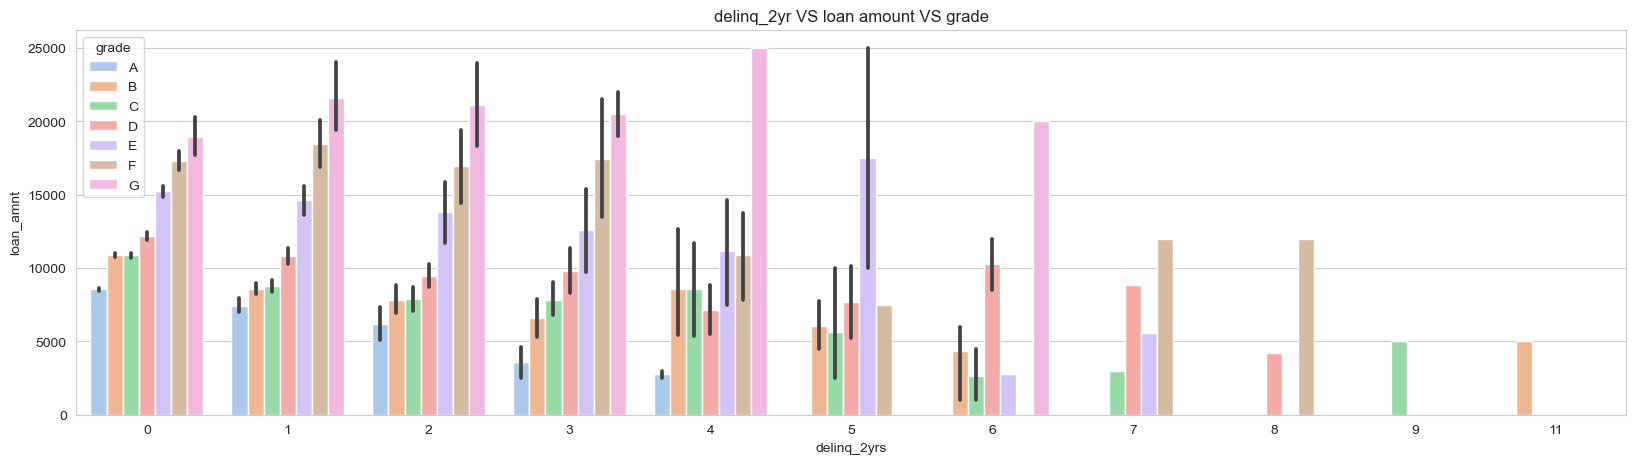

In [106]:
plt.figure(figsize=(20,5))
sns.barplot(x='delinq_2yrs', y='loan_amnt', hue='grade',data=loan_df)
plt.title('delinq_2yr VS loan amount VS grade')
plt.show()

#### Observation:

Loans with many missed payments don't get much investment, even if they ask for less money. They're seen as risky, so Lending Club might want to limit investing in them. Also, people with at least two missed payments are getting loans averaging over $15,000.

####  Annual Income Vs Employment Length (Subset) Vs Loan status

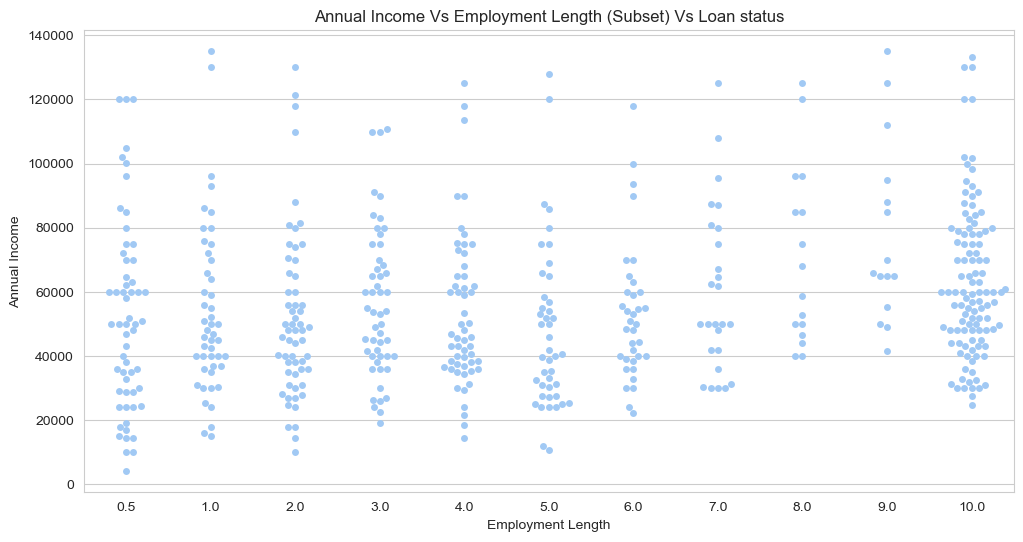

In [107]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=loan_df[loan_df.loan_status=='Charged Off'].sample(frac=0.1), x='emp_length', y='annual_inc')
plt.title('Annual Income Vs Employment Length (Subset) Vs Loan status')
plt.xlabel('Employment Length')
plt.ylabel('Annual Income')
plt.show()

#### Observation:
Borrower with high employment length despite of having high annual income tends to default more compare to the
ones having low employment length.
The reason may be short period of employement left(they are reaching their retirement in few years)


### Correlation Heatmap analysis

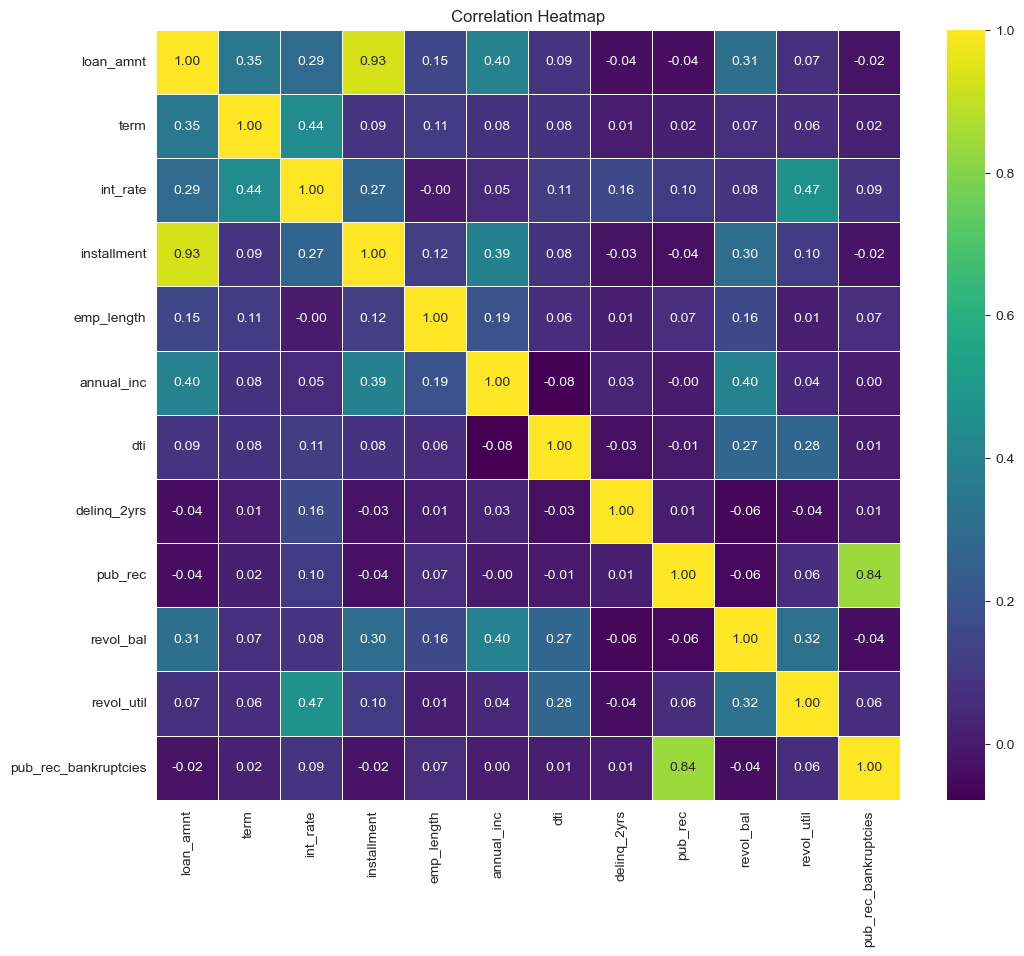

In [108]:
# Select numerical columns
numerical_columns = loan_df.select_dtypes(include=['int64', 'int32', 'float64']).columns
#Dropping more columns
heat_df=numerical_columns.drop(['sub_grade','open_acc','total_acc'])
# Calculate correlation matrix
correlation_matrix = loan_df[heat_df].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

#### Key Findings from Correlation Analysis:

#### Strong Correlation:

The monthly installment amount (installment) shows a robust correlation with loan amount.
The loan term (term) exhibits a st
rong correlation with the interest rate.

#### Weak Strong Postive Association: 
The annual income (annual_inc) is strongly correlated with the loan amount.

#### Weak Correlation:
The debt-to-income ratio (dti) demonstrates a weak correlation with most of the observed fields.
Employment length (emp_length) displays a weak correlation with various attributes.

#### Negative Correlation:
The presence of public record bankruptcies (pub_rec_bankruptcies) shows a negative correlation with almost every observed field.
Annual income (annual_inc) demonstrates a negative correlation with the debt-to-income ratio (dti).